In [1]:
# -*- coding: utf-8 -*-
"""
@author: RJ
"""

#from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LassoLarsCV

In [2]:
#Load the dataset
data = pd.read_csv("/Users/Rohit/Desktop/trees.csv")

In [3]:
#upper-case all DataFrame column names
data.columns = map(str.upper, data.columns)

# Data Management
data_clean = data.dropna()
recode1 = {1:1, 2:0}
data_clean['MALE']= data_clean['BIO_SEX'].map(recode1)

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
#select predictor variables and target variable as separate data sets  
predvar= data_clean[['MALE','HISPANIC','WHITE','BLACK','NAMERICAN','ASIAN',
'AGE','ALCEVR1','ALCPROBS1','MAREVER1','COCEVER1','INHEVER1','CIGAVAIL','SCHCONN1',
'ESTEEM1','VIOL1','PASSIST','DEVIANT1','GPA1','EXPEL1','FAMCONCT','PARACTV',
'PARPRES']]
 
# target = data_clean.SCHCONN1
target = data_clean.DEP1

In [5]:
# standardize predictors to have mean=0 and sd=1
 # changes all the values from a range of -1 to 1 and keeping it as a float.
predictors=predvar.copy()
from sklearn import preprocessing
predictors['MALE']=preprocessing.scale(predictors['MALE'].astype('float64'))
predictors['HISPANIC']=preprocessing.scale(predictors['HISPANIC'].astype('float64'))
predictors['WHITE']=preprocessing.scale(predictors['WHITE'].astype('float64'))
predictors['NAMERICAN']=preprocessing.scale(predictors['NAMERICAN'].astype('float64'))
predictors['ASIAN']=preprocessing.scale(predictors['ASIAN'].astype('float64'))
predictors['AGE']=preprocessing.scale(predictors['AGE'].astype('float64'))
predictors['ALCEVR1']=preprocessing.scale(predictors['ALCEVR1'].astype('float64'))
predictors['ALCPROBS1']=preprocessing.scale(predictors['ALCPROBS1'].astype('float64'))
predictors['MAREVER1']=preprocessing.scale(predictors['MAREVER1'].astype('float64'))
predictors['COCEVER1']=preprocessing.scale(predictors['COCEVER1'].astype('float64'))
predictors['INHEVER1']=preprocessing.scale(predictors['INHEVER1'].astype('float64'))
predictors['CIGAVAIL']=preprocessing.scale(predictors['CIGAVAIL'].astype('float64'))
predictors['SCHCONN1']=preprocessing.scale(predictors['SCHCONN1'].astype('float64'))
predictors['ESTEEM1']=preprocessing.scale(predictors['ESTEEM1'].astype('float64'))
predictors['VIOL1']=preprocessing.scale(predictors['VIOL1'].astype('float64'))
predictors['PASSIST']=preprocessing.scale(predictors['PASSIST'].astype('float64'))
predictors['DEVIANT1']=preprocessing.scale(predictors['DEVIANT1'].astype('float64'))
predictors['GPA1']=preprocessing.scale(predictors['GPA1'].astype('float64'))
predictors['EXPEL1']=preprocessing.scale(predictors['EXPEL1'].astype('float64'))
predictors['FAMCONCT']=preprocessing.scale(predictors['FAMCONCT'].astype('float64'))
predictors['PARACTV']=preprocessing.scale(predictors['PARACTV'].astype('float64'))
predictors['PARPRES']=preprocessing.scale(predictors['PARPRES'].astype('float64'))

In [6]:
# split data into train and test sets
pred_train, pred_test, tar_train, tar_test = train_test_split(predictors, target, 
                                                              test_size=.3, random_state=123)

In [7]:
# specify the lasso regression model
model=LassoLarsCV(cv=10, precompute=False).fit(pred_train,tar_train)

In [8]:
# print variable names and regression coefficients
dict(zip(predictors.columns, model.coef_))

{'AGE': 0.36782904839027469,
 'ALCEVR1': 0.15365195102379575,
 'ALCPROBS1': 0.28697391793381588,
 'ASIAN': 0.047412176135255481,
 'BLACK': 0.0,
 'CIGAVAIL': 0.064324369645835475,
 'COCEVER1': 0.1351179611310237,
 'DEVIANT1': 0.36670412833232074,
 'ESTEEM1': -1.7652286145736888,
 'EXPEL1': 0.0,
 'FAMCONCT': -0.76871421576887866,
 'GPA1': -0.090492604677189462,
 'HISPANIC': 0.0,
 'INHEVER1': 0.0,
 'MALE': -0.85866012265370595,
 'MAREVER1': 0.0050799568064406097,
 'NAMERICAN': 0.095304431061099246,
 'PARACTV': 0.48203005783859237,
 'PARPRES': -0.060793321061829733,
 'PASSIST': 0.29201801098681479,
 'SCHCONN1': -1.0858658834933537,
 'VIOL1': 0.41709696946651742,
 'WHITE': -0.29107217373767613}

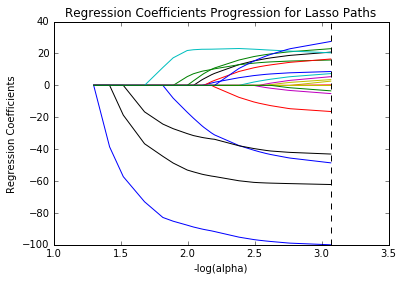

In [10]:
# plot coefficient progression
%matplotlib inline
m_log_alphas = -np.log10(model.alphas_)
ax = plt.gca()
plt.plot(m_log_alphas, model.coef_path_.T)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.ylabel('Regression Coefficients')
plt.xlabel('-log(alpha)')
plt.title('Regression Coefficients Progression for Lasso Paths')

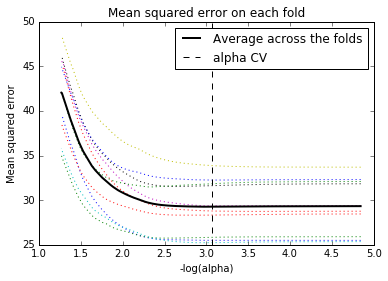

In [11]:
# plot mean square error for each fold
m_log_alphascv = -np.log10(model.cv_alphas_)
plt.figure()
plt.plot(m_log_alphascv, model.cv_mse_path_, ':')
plt.plot(m_log_alphascv, model.cv_mse_path_.mean(axis=-1), 'k',
         label='Average across the folds', linewidth=2)
plt.axvline(-np.log10(model.alpha_), linestyle='--', color='k',
            label='alpha CV')
plt.legend()
plt.xlabel('-log(alpha)')
plt.ylabel('Mean squared error')
plt.title('Mean squared error on each fold')

In [12]:
# MSE from training and test data
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(tar_train, model.predict(pred_train))
test_error = mean_squared_error(tar_test, model.predict(pred_test))
print ('training data MSE')
print(train_error)
print ('test data MSE')
print(test_error)

# R-square from training and test data
rsquared_train=model.score(pred_train,tar_train)
rsquared_test=model.score(pred_test,tar_test)
print ('training data R-square')
print(rsquared_train)
print ('test data R-square')
print(rsquared_test)

training data MSE
28.8359791082
test data MSE
30.1731423384
training data R-square
0.313688817193
test data R-square
0.340459503205
